# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [3]:
# Import the required packages

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

In [5]:
df = pd.read_csv('BA_reviews.csv')
df.head

In [ ]:
df.drop('Unamed: 0')

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
country =[]
date = []
recommended=[]
Class=[]
value_for_money=[]
rating=[]
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):

        reviews.append(para.get_text())
    for j  in parsed_content.find_all('h3',{'class', 'text_sub_header userStatusWrapper'}):
    #print(i)
        country.append(re.findall(r'\(.*?\)',j.text)[0][1:-1])
    #print(len(country))
    review_value = [k.text for k in parsed_content.find_all('td',{ 'class': 'review-value'})]
    for j in review_value:
        if j == 'yes' or j =='no':
            recommended.append(j)
    for j in review_value:
        if ('Class' in j) or (j == 'Premium Economy'):
            Class.append(j)
    for j in parsed_content.find_all('h3',{'class', 'text_sub_header userStatusWrapper'}):
        date.append(j.time.text)
    
    for k in parsed_content.find_all('table', {'class':'review-ratings'}):
        for j in k.find_all('tr'):
            if j.find('td', {'class':"review-rating-header value_for_money"}) != None:
                #print(len(i.find('td', {'class': "review-rating-stars stars"}).find_all('span', {'class':"star fill"})))
                value_for_money.append(len(j.find('td', {'class': "review-rating-stars stars"}).find_all('span', {'class':"star fill"})))

    for j in parsed_content.find_all('div', {'itemprop':"reviewRating"}):
        rating.append(j.find('span', {'itemprop':"ratingValue"}).text)

    
    print(f"   ---> {len(reviews)} total reviews")
    

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df['date'] = date
df['country'] = country
df['value_for_money'] = value_for_money
df['rating'] = rating
df['recommendation'] = recommended
df['class'] =Class


In [ ]:
df.head()

In [6]:
#show information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1000 non-null   int64 
 1   reviews          1000 non-null   object
 2   date             1000 non-null   object
 3   country          1000 non-null   object
 4   value_for_money  1000 non-null   int64 
 5   rating           1000 non-null   int64 
 6   recommendation   1000 non-null   object
 7   class            1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- `date` it need changed to datetype
- `rating` it need to change to int type


In [58]:
#convert date 
df.date = pd.to_datetime(df.date)

In [59]:
#convert rating
df.rating = df.rating.astype('int')

0.335

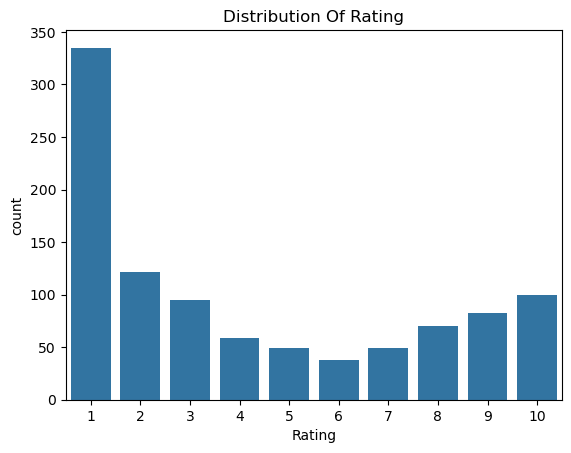

In [73]:
#visualize 
plt.title('Distribution Of Rating')
sns.countplot(data = df, x = df.rating, color = sns.color_palette()[0])
plt.xlabel('Rating');

#calculate percentage of rating
pct_low = sum(df.rating == 1)/len(df)

#print percentage
print('percentage of low rating', pct_low)

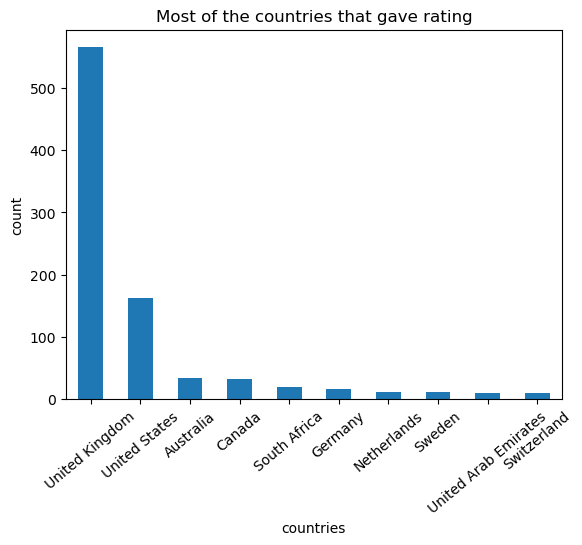

In [61]:
#visualization
df.country.value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xticks(rotation=40)
plt.title('Most of the countries that gave rating')
plt.xlabel('countries')
plt.ylabel('count');

In [ ]:
#visualization 
sns.countplot(data = df, x = df.value_for_money, color = sns.color_palette()[0])
plt.xlabel('Value For Money')
plt.title('Distribution Of Value For Money Rating');

#calculate percentage
pct_low_rating = sum(df.value_for_money==1) / len(df)


#calculate percentage
pct_high_rating = sum(df.value_for_money==5) / len(df)



#print
print("Percentage of Low rating", pct_low_rating)
print("Percentage of Low rating", pct_high_rating)


0.344

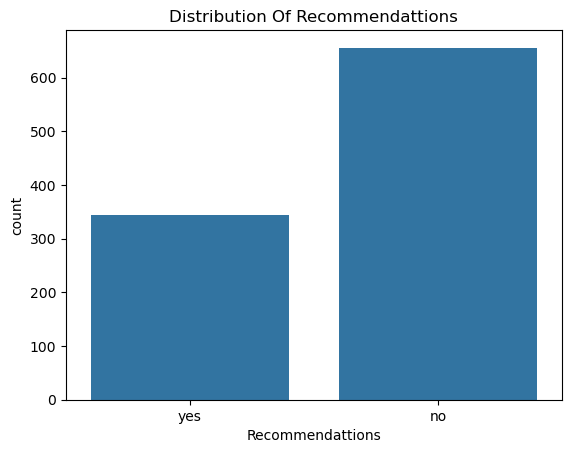

In [74]:
#visualization 
sns.countplot(data = df, x = df.recommendation, color = sns.color_palette()[0])
plt.xlabel('Recommendattions')
plt.title('Distribution Of Recommendattions')

#calculate percentage
pct_recommended = sum(df.recommendation=='yes') /len(df)

#print
print("Percentage of Recommended", pct_recommended)


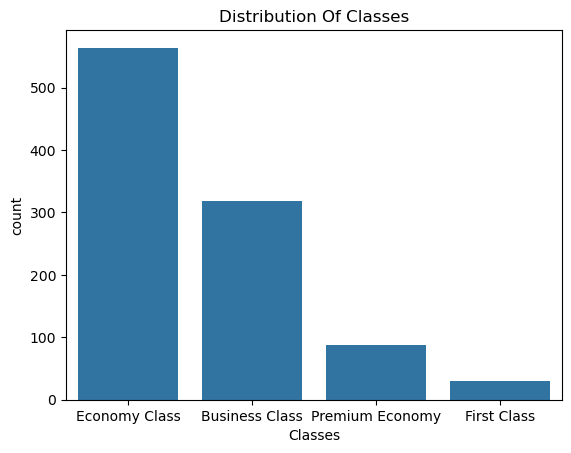

In [64]:
sns.countplot(data = df, x = df['class'], color = sns.color_palette()[0], order = ['Economy Class', 'Business Class', 'Premium Economy','First Class'])
plt.xlabel('Classes')
plt.title('Distribution Of Classes');

In [87]:
df.groupby(df['class'])['recommendation'].value_counts(normalize=True)

class            recommendation
Business Class   no                0.583072
                 yes               0.416928
Economy Class    no                0.702128
                 yes               0.297872
First Class      yes               0.533333
                 no                0.466667
Premium Economy  no                0.689655
                 yes               0.310345
Name: recommendation, dtype: float64

In [92]:
df.groupby(df['class'])['rating'].value_counts(normalize=True).sort_values()

class            rating
First Class      7         0.033333
                 4         0.033333
                 2         0.033333
Economy Class    6         0.033688
Premium Economy  6         0.034483
Business Class   6         0.037618
Economy Class    7         0.039007
                 4         0.044326
                 5         0.044326
Premium Economy  5         0.045977
                 8         0.045977
Economy Class    8         0.053191
Business Class   4         0.053292
Premium Economy  3         0.057471
                 7         0.057471
Business Class   5         0.062696
Economy Class    9         0.065603
Business Class   7         0.065831
Premium Economy  9         0.068966
Business Class   3         0.084639
Economy Class    10        0.095745
First Class      8         0.100000
                 10        0.100000
Business Class   9         0.100313
                 8         0.103448
Premium Economy  10        0.103448
Economy Class    3         0.104610
Busi

<AxesSubplot:ylabel='country,recommendation'>

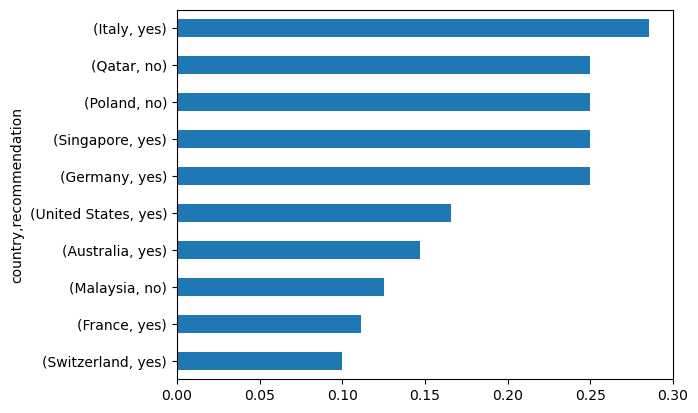

In [96]:
df.groupby(df['country'])['recommendation'].value_counts(normalize=True).sort_values()[:10].plot(kind = 'barh')

In [65]:
df.reviews  =df.reviews.str.replace('✅ Trip Verified |',"")


C:\Users\omnia\AppData\Local\Temp\ipykernel_5408\2622108401.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.reviews  =df.reviews.str.replace('✅ Trip Verified |',"")


In [66]:
df.reviews[0]

"|  I had the most fantastic BA Flight today. The cabin crew in my seat zone 6D were of the best I have experienced. Although the 777 had the old style rear/front seating - it was comfortable and felt open and spacious. BA have done great things with the menu - it was nice not to have to eat breakfast food on the pre-arrival meal into HKG at 1730PM local time having left London at 2200 the night before. The dinner offering was equally ample and delicious. The inflight entertainment had a great collection of TV and current films and the inflight map was first rate. Previously not a huge BA fan - but after this 12 hour flight I could only recommend it without reserve. I flew the new BA suite in J class on a recent Delhi to London flight and enjoyed that product (although I felt it slightly more cramped ) but I think BA have stepped up with really comfortable bedding and food and very friendly crew who engaged throughout the flight in the best way. Couldn't recommend BA more on this fligh

In [67]:
# Create a textblob object  
df['polarity'] = df.reviews.apply(lambda x: TextBlob(x).sentiment[0])

In [68]:
df['label'] = df.polarity.apply(lambda x: 'Positive' if x >= 0.3 else 'Negative')

Percentage Of Negative 0.867


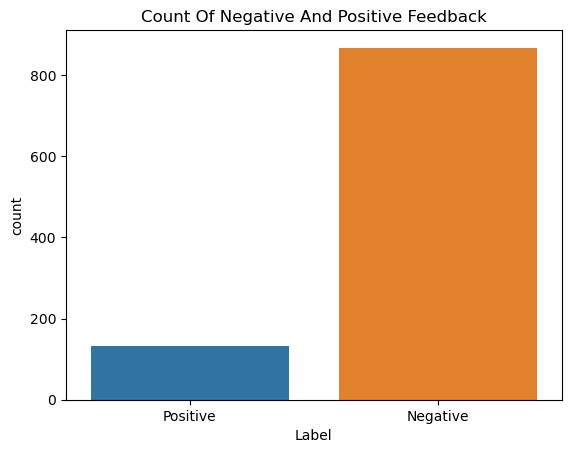

In [109]:
#visualize count 
sns.countplot(data=df, x=df.label)
plt.xlabel('Label')
plt.title('Count Of Negative And Positive Feedback');

#calcualte percentage of negative feedback
pct_negative = sum(df.label == 'Negative') / len(df)

#print percentage
print('Percentage Of Negative', pct_negative)

In [105]:
#create positive and negatiive corpus
negative_corpus = ' '.join(df[df.label=='Negative']['reviews'])
positive_corups = ' '.join(df[df.label=='Positive']['reviews'])

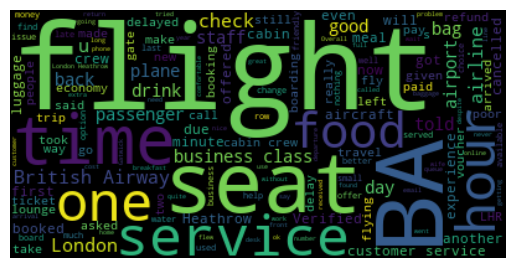

In [107]:
generator_negative = WordCloud().generate(negative_corpus)
plt.imshow(generator_negative, interpolation='bilinear')
plt.axis('off')
plt.show()

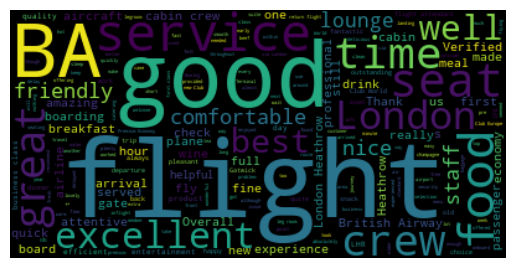

In [108]:
generator_positive = WordCloud().generate(positive_corups)
plt.imshow(generator_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
df.to_csv("BA_reviews.csv")

In [ ]:
food_beverages = []
seat_comfort = []
value_for_money=[]

for j in parsed_content.find_all('table', {'class':'review-ratings'}): 
    for k in j.find_all('tr'):
        #print(k, 1)
        if (k.find('td', {'class':'review-rating-header seat-comfort'}) != None) or(k.find('td', {'class':'review-rating-header seat_comfort'}) != None):
            #print(len(k.find('td', {'class': "review-rating-stars stars"}).find_all('span', {'class':"star fill"})))
            seat_comfort.append(len(k.find('td', {'class': "review-rating-stars stars"}).find_all('span', {'class':"star fill"})))
    if (len(k.find_all('td', {'class':'review-rating-header seat-comfort'})) == 0) or(len(k.find_all('td', {'class':'review-rating-header seat_comfort'}) )== 0):
        print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\|', k.find_all('td', {'class':'review-rating-header seat-comfort'}), len(k.find_all('td', {'class':'review-rating-header seat_comfort'}) )== 0)    
        seat_comfort.append(0)
        
        if k.find('td', {'class':"review-rating-header value_for_money"}) != None:
            print(len(i.find('td', {'class': "review-rating-stars stars"}).find_all('span', {'class':"star fill"})))
            value_for_money.append(len(k.find('td', {'class': "review-rating-stars stars"}).find_all('span', {'class':"star fill"})))
            continue
        if (k.find('td', {'class':'review-rating-header food-beverages'}) != None) or(k.find('td', {'class':'review-rating-header food_and_beverages'}) != None):
            food_beverages.append(len(k.find('td', {'class': "review-rating-stars stars"}).find_all('span', {'class':"star fill"})))
            continue


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.